<a href="https://colab.research.google.com/github/Arshadbabar/Demo-Project-/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_cleaned.csv to Titanic_cleaned (1).csv


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import(
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    RocCurveDisplay

)


In [44]:
df=pd.read_csv('Titanic_cleaned.csv')

In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,0,0.271174,1,0,-0.502445,False,True,2,0
1,1,1,1,0.472229,1,0,0.786845,False,False,2,0
2,1,3,1,0.321438,0,0,-0.488854,False,True,1,1
3,1,1,1,0.434531,1,0,0.420730,False,True,2,0
4,0,3,0,0.434531,0,0,-0.486337,False,True,1,1


In [46]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_Q,0
Embarked_S,0
FamilySize,0


In [47]:
X=df.drop(columns=['Survived'])
y=df['Survived']

print('Feature:',X.shape)
print('Target:',y.shape)


Feature: (891, 10)
Target: (891,)


In [48]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S', 'FamilySize', 'IsAlone'],
      dtype='object')

In [49]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42

)
print('Training Size:',X_train.shape)
print('Testing Size:',X_test.shape)

Training Size: (712, 10)
Testing Size: (179, 10)


In [50]:
model=LogisticRegression()
model.fit(X_train,y_train)
print('Model training is completed')

Model training is completed


In [51]:
y_pred=model.predict(X_test)
print('Actual Value:',y_test[:5].values)
print('Predict Value',y_pred[:5])

y_prob = model.predict_proba(X_test)[:,1]

Actual Value: [1 0 0 1 1]
Predict Value [0 0 0 1 1]


In [52]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('\nClassification report\n')
print(classification_report(y_test,y_pred))

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


Classification report

              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Accuracy : 0.7988826815642458
Precision: 0.7878787878787878
Recall   : 0.7027027027027027
F1 Score : 0.7428571428571429


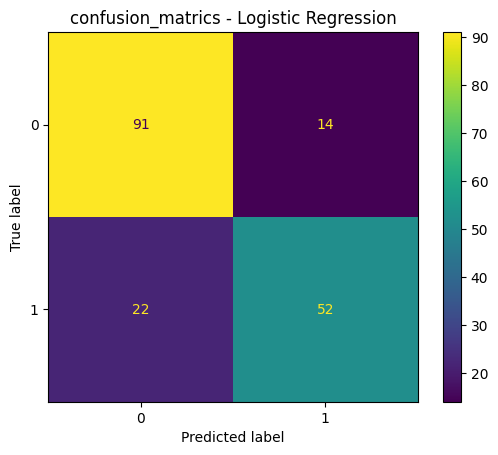

In [56]:
cm=confusion_matrix(y_test,y_pred)

dis=ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot()
plt.title('confusion_matrics - Logistic Regression')
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

AUC score 0.8815958815958815


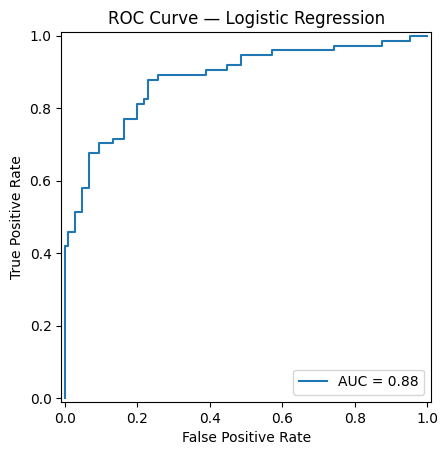

In [58]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
auc_score=roc_auc_score(y_test,y_prob)

print('AUC score',auc_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score)
roc_display.plot()

plt.title("ROC Curve — Logistic Regression")
plt.savefig("roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()